In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [3]:
a=[1,2,3]
b=[3,4,5]
for idx,(q,e) in enumerate(zip(a,b)):
    print(q,e)

1 3
2 4
3 5


In [4]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for n in range(num_episodes):
        if (n+1) % 1000 == 0:
            print("\rEpisode {}/{}.".format(n+1, num_episodes), end="")
            sys.stdout.flush()        
            
        obs = env.reset()
        G = 0.0
        
        episode_rewards = []
        episode_states = []
        while True:#sample from env untill this episode finish
            action = policy(obs)
            episode_states.insert(0,obs)
            obs,reward,done,_ = env.step(action)
            episode_rewards.insert(0,reward)
            if done:
                break
                
        #see page 114 in RL book
        for idx,(state,reward) in enumerate(zip(episode_states,episode_rewards)):
            G = discount_factor*G +reward
            past_states = episode_states[idx+1:]
            if state not in past_states:
                returns_sum[state] += G
                returns_count[state] += 1.0
                V[state] = returns_sum[state]/returns_count[state]
    return V    

In [5]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode 10000/10000.

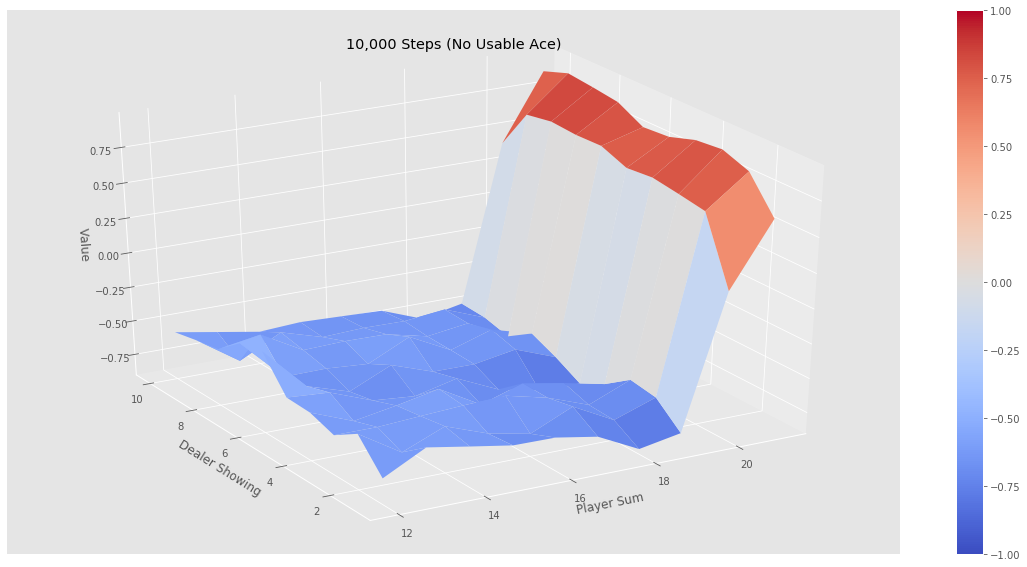

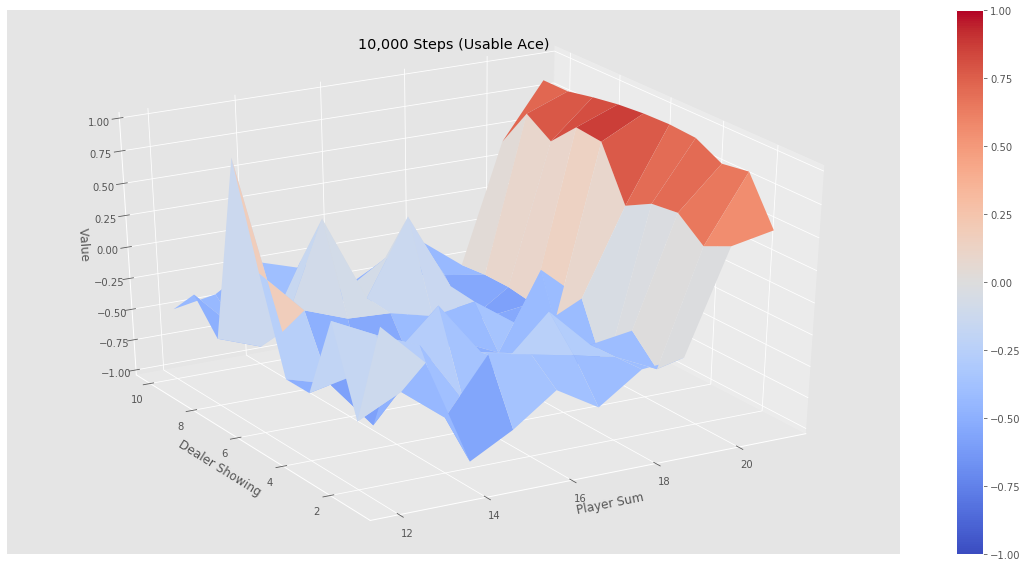

Episode 500000/500000.

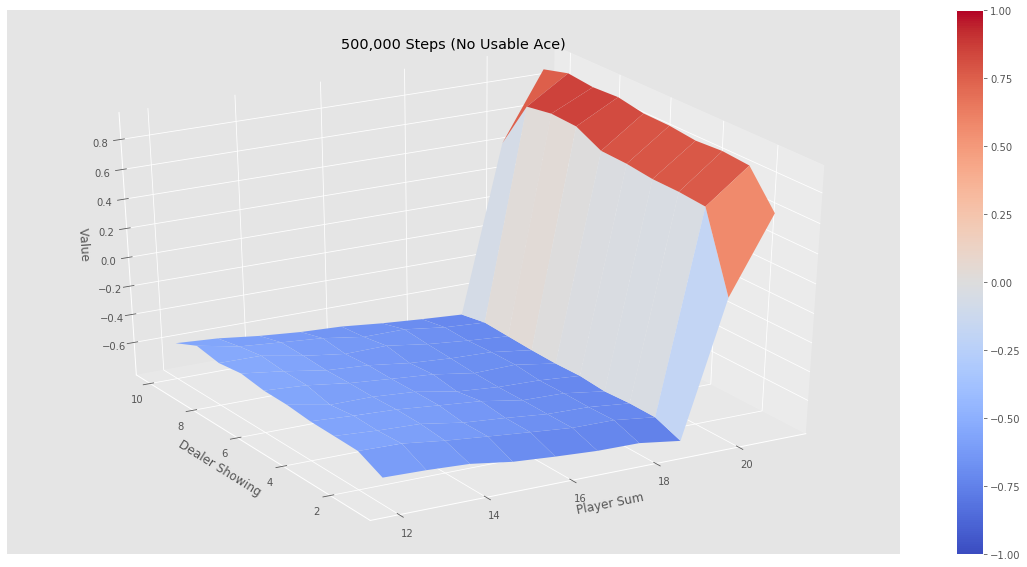

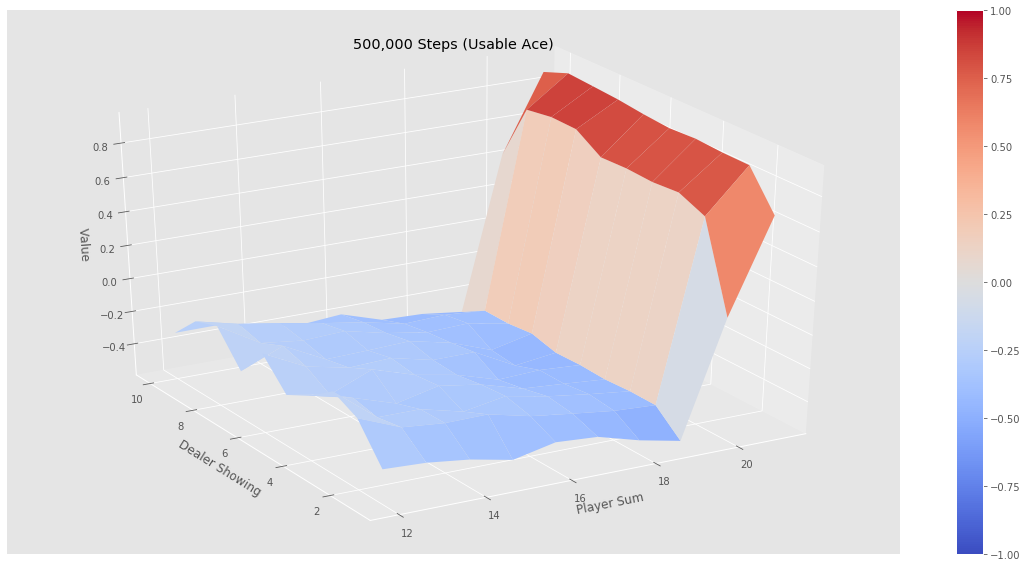

In [6]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")